# 1. Importing libraries

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix

%config InlineBackend.figure_format = 'svg' 
plt.style.use('bmh')
plt.rcParams['image.cmap'] = 'Paired_r'
%matplotlib inline

# 2.Dataset  

In [25]:
dataset = pd.read_csv('./iris/iris.csv')
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [26]:
unique_classes = dataset['class'].unique()

print("Unique class:")
for clc in unique_classes:
    print(clc)

Unique class:
Iris-setosa
Iris-versicolor
Iris-virginica


## Iris-setosa

In [27]:
dataset['class'] = dataset['class'].replace({'Iris-setosa': 1, 'Iris-versicolor': 0, 'Iris-virginica': 0})
dataset

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


In [28]:
dataset.corr()

,sepal_length,sepal_width,petal_length,petal_width,class
sepal_length,1.000000,-0.109369,0.871754,0.817954,-0.717416
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,0.595601
petal_length,0.871754,-0.420516,1.000000,0.962757,-0.922688
petal_width,0.817954,-0.356544,0.962757,1.000000,-0.887510
class,-0.717416,0.595601,-0.922688,-0.887510,1.000000


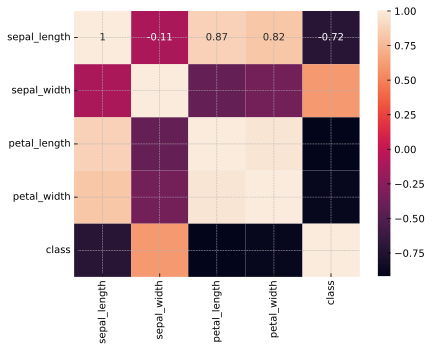

In [29]:
plt.figure()
sns.heatmap(dataset.corr(),annot=True)
plt.show()

In [30]:
X = dataset[['petal_length', 'petal_width']].values
y = dataset[['class']].values

In [31]:
print(X.shape)
print(y.shape)

(150, 2)
(150, 1)


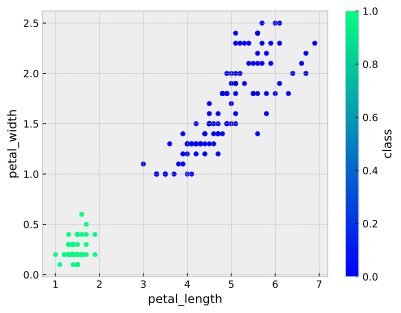

In [32]:
dataset.plot.scatter(x='petal_length',y='petal_width', c='class', colormap='winter')
plt.show()

# 3. Spliting the data to train and test

In [33]:
x_train, x_test, y_train, y_test =  train_test_split(X, y, test_size=0.2, random_state=42)

print('x_train shape  : ', x_train.shape)
print('x_test shape  : ', x_test.shape)
print('y_train shape  : ', y_train.shape)
print('y_test shape  : ', y_test.shape)

x_train shape  :  (120, 2)
x_test shape  :  (30, 2)
y_train shape  :  (120, 1)
y_test shape  :  (30, 1)


# 4. Modèle

In [34]:
# La fonction sigmoide
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [35]:
def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)

In [36]:
# Modèle
def modele(X, W, b):
    Z = X.dot(W) + b
    A = sigmoid(Z)
    return A

# 5. Fonction Coût 

In [37]:
def log_loss(y, A):
    return 1/len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))

# 6. Optimisation - Gradient et Descente de Gradient

In [38]:
def gradients(X, A, y):
    dW = 1/len(y) * np.dot(X.T, A - y)
    db = 1/len(y) * np.sum(A - y)
    return (dW, db)

In [39]:
def optimisation(X, W, b, A, y, learning_rate):
    dW, db = gradients(X, A, y)
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)

# 7. Prédiction

In [40]:
def predict(X, W, b):
    A = modele(X, W, b)
    print(A)
    return A >= 0.5

# 8. Modèle final

In [41]:
def regression_logistique(X, y, learning_rate=0.1, n_iter=10000):
  # Initialisation
    W, b = initialisation(X)
    loss_history = []
  # Entrainement
    for i in range(n_iter):
        A = modele(X, W, b)
        loss_history.append(log_loss(y, A))
        W, b = optimisation(X, W, b, A, y, learning_rate=0.1)

  # Prediction
    plt.plot(loss_history)
    plt.xlabel('n_iteration')
    plt.ylabel('Log_loss')
    plt.title('Evolution des erreurs')
    return W,b

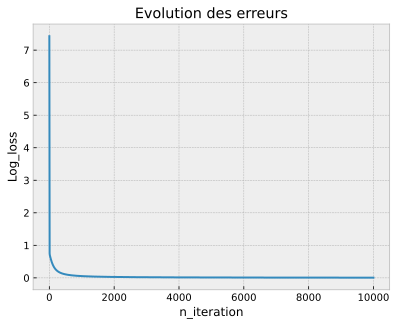

In [42]:
W1,b1=regression_logistique(x_train, y_train)

# 9. Evaluation du modèle et Visualisation

In [43]:
from sklearn.metrics import accuracy_score
y_pred = predict(x_test, W1, b1)
print("Accuracy=", accuracy_score(y_test, y_pred))

[[5.78296854e-04]
 [9.77541841e-01]
 [2.47659465e-08]
 [2.74740699e-04]
 [1.96588771e-04]
 [9.79332940e-01]
 [5.93305190e-03]
 [2.22327901e-06]
 [2.74740699e-04]
 [4.25219947e-03]
 [7.71554944e-06]
 [9.95285745e-01]
 [9.94445263e-01]
 [9.93955782e-01]
 [9.86252886e-01]
 [1.10116871e-04]
 [5.85551813e-07]
 [6.42377845e-03]
 [6.29533764e-04]
 [9.65118676e-07]
 [9.88318387e-01]
 [2.91489751e-05]
 [9.73621726e-01]
 [1.46118632e-06]
 [2.99756751e-07]
 [1.73175482e-06]
 [3.07655452e-06]
 [3.01253835e-07]
 [9.89259471e-01]
 [9.88318387e-01]]
Accuracy= 1.0


[0.98618518]
[ True]
[0.00012048]
[False]
[0.92885505]
[ True]


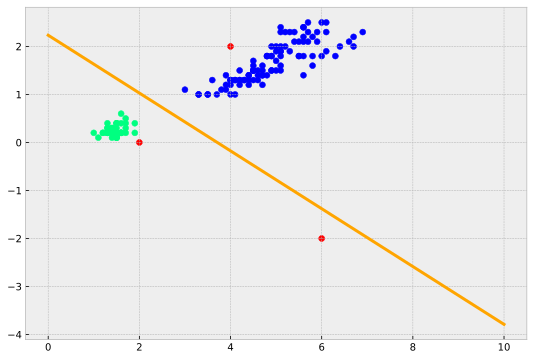

In [44]:
# Visualiser le dataset
fig, ax = plt.subplots(figsize=(9, 6))
ax.scatter(X[:,0], X[:, 1], c=y, cmap='winter')

# Dessiner la frontière de décision
x1 = np.linspace(0, 10, 200)
x2 = ( - W1[0] * x1 - b1) / W1[1]
ax.plot(x1, x2, c='orange', lw=3)

# Prédire la classe de nouveaux éléments

new_1=np.array([2, 0])
new_2=np.array([4, 2])
new_3=np.array([6, -2])
ax.scatter(new_1[0], new_1[1], c='r')
ax.scatter(new_2[0], new_2[1], c='r')
ax.scatter(new_3[0], new_3[1], c='r')
print(predict(new_1, W1, b1))
print(predict(new_2, W1, b1))
print(predict(new_3, W1, b1))

plt.show()

## Iris-versicolor

In [45]:
dataset = pd.read_csv('./iris/iris.csv')
dataset['class'] = dataset['class'].replace({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 0})
dataset

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


In [46]:
x = dataset[['petal_length', 'petal_width']].values
y = dataset[['class']].values

In [47]:
print(x.shape)
print(y.shape)

(150, 2)
(150, 1)


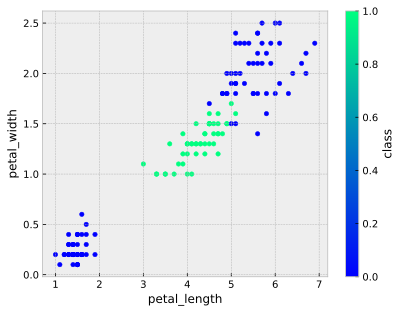

In [48]:
dataset.plot.scatter(x='petal_length',y='petal_width', c='class', colormap='winter')
plt.show()

In [49]:
X_train, X_test, y_train, y_test =  train_test_split(x, y, test_size=0.2, random_state=42)

print('X_train shape  : ', X_train.shape)
print('X_test shape  : ', X_test.shape)
print('y_train shape  : ', y_train.shape)
print('y_test shape  : ', y_test.shape)

X_train shape  :  (120, 2)
X_test shape  :  (30, 2)
y_train shape  :  (120, 1)
y_test shape  :  (30, 1)


In [50]:
# X_train = np.array(X_train).reshape(-1, 1)
# Define maximum polynomial degree
max_degree = 10

# Initialize lists to store BIC values and models
bic_values = []
models = []

# Loop over polynomial degrees
for degree in range(1, max_degree+1):
    # Create polynomial features
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(X_train)
    
    # Fit polynomial regression model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # Compute number of parameters
    num_params = X_train_poly.shape[1]
    
    # Compute log-likelihood
    y_train_pred = model.predict(X_train_poly)
    log_likelihood = -0.5 * len(X_train) * np.log(mean_squared_error(y_train, y_train_pred))
    
    # Compute BIC
    bic = -2 * log_likelihood + num_params * np.log(len(X_train))
    
    # Append BIC value and model
    bic_values.append(bic)
    models.append(model)

# Find index of model with lowest BIC
best_model_idx = np.argmin(bic_values)
best_model = models[best_model_idx]
best_degree = best_model_idx + 1

print(f"Best polynomial degree: {best_degree}")

Best polynomial degree: 4


In [51]:
degree = 4

# Create PolynomialFeatures transformer
poly = PolynomialFeatures(degree=degree, include_bias=False)

# Fit and transform the input data
X = poly.fit_transform(x)

print(X.shape)
print(X[:10])

(150, 14)
[[1.4000e+00 2.0000e-01 1.9600e+00 2.8000e-01 4.0000e-02 2.7440e+00
  3.9200e-01 5.6000e-02 8.0000e-03 3.8416e+00 5.4880e-01 7.8400e-02
  1.1200e-02 1.6000e-03]
 [1.4000e+00 2.0000e-01 1.9600e+00 2.8000e-01 4.0000e-02 2.7440e+00
  3.9200e-01 5.6000e-02 8.0000e-03 3.8416e+00 5.4880e-01 7.8400e-02
  1.1200e-02 1.6000e-03]
 [1.3000e+00 2.0000e-01 1.6900e+00 2.6000e-01 4.0000e-02 2.1970e+00
  3.3800e-01 5.2000e-02 8.0000e-03 2.8561e+00 4.3940e-01 6.7600e-02
  1.0400e-02 1.6000e-03]
 [1.5000e+00 2.0000e-01 2.2500e+00 3.0000e-01 4.0000e-02 3.3750e+00
  4.5000e-01 6.0000e-02 8.0000e-03 5.0625e+00 6.7500e-01 9.0000e-02
  1.2000e-02 1.6000e-03]
 [1.4000e+00 2.0000e-01 1.9600e+00 2.8000e-01 4.0000e-02 2.7440e+00
  3.9200e-01 5.6000e-02 8.0000e-03 3.8416e+00 5.4880e-01 7.8400e-02
  1.1200e-02 1.6000e-03]
 [1.7000e+00 4.0000e-01 2.8900e+00 6.8000e-01 1.6000e-01 4.9130e+00
  1.1560e+00 2.7200e-01 6.4000e-02 8.3521e+00 1.9652e+00 4.6240e-01
  1.0880e-01 2.5600e-02]
 [1.4000e+00 3.0000e-01 

In [52]:
y = y.reshape(-1,1)
y.shape

(150, 1)

In [53]:
x_train, x_test, y_train, y_test =  train_test_split(X, y, test_size=0.2, random_state=42)

print('x_train shape  : ', x_train.shape)
print('x_test shape  : ', x_test.shape)
print('y_train shape  : ', y_train.shape)
print('y_test shape  : ', y_test.shape)

x_train shape  :  (120, 14)
x_test shape  :  (30, 14)
y_train shape  :  (120, 1)
y_test shape  :  (30, 1)


In [54]:
x_train.mean()

59.065254107142856

In [55]:
x_train.std()

176.81590698385173

In [56]:
def z_score_normalization(data):
    # Calcul des moyennes et des déviations standard de chaque caractéristique
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)

    # Normalisation des données en utilisant la méthode Z-score
    data_normalized = (data - mean) / std

    return data_normalized, mean, std

In [57]:
x_train_norm, mean, std = z_score_normalization(x_train)
x_train_norm

array([[-1.5639872 , -1.30948358, -1.28897203, ..., -0.86915058,
        -0.80186836, -0.72849057],
       [-1.27728011, -1.04292204, -1.18786403, ..., -0.86392965,
        -0.79818784, -0.72600799],
       [ 0.38562104,  0.28988568,  0.19610235, ..., -0.2507046 ,
        -0.29723448, -0.33127666],
       ...,
       [-1.44930436, -1.30948358, -1.25338201, ..., -0.86886343,
        -0.80180145, -0.72849057],
       [ 0.15625537,  0.02332414, -0.07567597, ..., -0.49389581,
        -0.51311419, -0.51416057],
       [ 1.24574233,  1.22285108,  1.44579729, ...,  1.63481198,
         1.48306632,  1.28307722]])

In [58]:
x_train_norm.mean()

8.458842092382145e-17

In [59]:
x_train_norm.std()

0.9999999999999999

In [60]:
mean

array([  3.7275    ,   1.1825    ,  16.93558333,   5.66708333,
         1.96125   ,  84.342075  ,  28.80735833,  10.08870833,
         3.613675  , 439.65817583, 151.39341583,  53.31170917,
        19.18036083,   7.0441625 ])

In [61]:
std

array([  1.7439401 ,   0.75029578,  12.36301715,   4.60389788,
         1.78820047,  76.42506377,  27.40737826,  10.39406632,
         4.1254312 , 469.2128603 , 164.86457459,  61.29169117,
        23.90961122,   9.66733512])

In [62]:
x_test_norm = (x_test - mean)/std

In [63]:
X_train_norm = np.hstack((x_train_norm, np.ones((x_train.shape[0], 1))))
X_test_norm = np.hstack((x_test_norm, np.ones((x_test.shape[0], 1))))
Y_train = y_train
Y_test = y_test

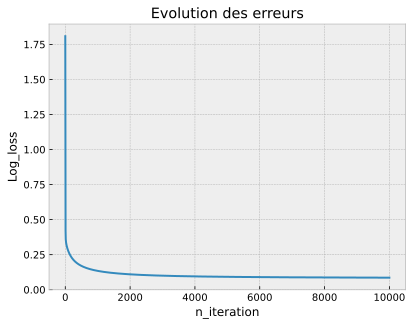

In [64]:
W2,b2=regression_logistique(X_train_norm, Y_train)

In [65]:
y_pred = predict(X_test_norm, W2, b2)
print("Accuracy=",np.round(accuracy_score(Y_test, y_pred)*100),'%')

[[9.67098196e-01]
 [9.19668771e-03]
 [3.28272193e-17]
 [9.46632862e-01]
 [9.18463313e-01]
 [9.84244374e-03]
 [9.89636981e-01]
 [2.66270721e-06]
 [9.46632862e-01]
 [9.88733131e-01]
 [2.76667224e-03]
 [7.92679054e-04]
 [1.16660951e-03]
 [1.10975720e-03]
 [4.74179374e-03]
 [8.22537542e-01]
 [3.00580960e-08]
 [9.87481993e-01]
 [9.74402264e-01]
 [2.95353546e-07]
 [3.19515985e-03]
 [1.88177951e-01]
 [1.36734954e-02]
 [3.98092400e-06]
 [3.12331699e-09]
 [1.05384353e-06]
 [2.80301740e-04]
 [3.87827655e-10]
 [3.39343352e-03]
 [3.19515985e-03]]
Accuracy= 100.0 %


In [66]:
cm = confusion_matrix(Y_test, y_pred)

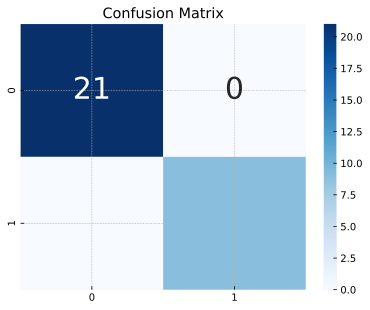

In [67]:
# Plot confusion matrix

ax = plt.axes()
df_cm = cm
sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()

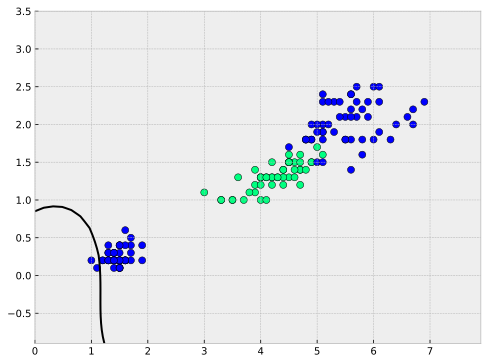

In [68]:
plt.figure(figsize=(8, 6))

# Plot the data points
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.winter, s=50, edgecolors='k')
u = np.linspace(x[:, 0].min() - 1, x[:, 0].max() + 1, 50)
v = np.linspace(x[:, 1].min() - 1, x[:, 1].max() + 1, 50)
U, V = np.meshgrid(u, v)

degree = 4
X_poly = PolynomialFeatures(degree=degree).fit_transform(np.hstack((U.ravel()[:, np.newaxis], V.ravel()[:, np.newaxis])))
Z = X_poly.dot(W2) + b2

# reshape U, V, Z back to matrix
U = U.reshape((50, 50))
V = V.reshape((50, 50))
Z = Z.reshape((50, 50))

plt.grid(True)
plt.contour(U, V, Z, levels=[0], colors='k', linestyles=['-'])
plt.show()

## Iris-virginica

In [72]:
dataset = pd.read_csv('./iris/iris.csv')
dataset['class'] = dataset['class'].replace({'Iris-setosa': 0, 'Iris-versicolor': 0, 'Iris-virginica': 1})
dataset

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


In [73]:
X = dataset[['petal_length', 'petal_width']].values
y = dataset[['class']].values

In [74]:
print(X.shape)
print(y.shape)

(150, 2)
(150, 1)


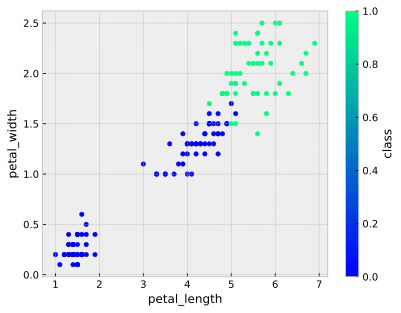

In [75]:
dataset.plot.scatter(x='petal_length',y='petal_width', c='class', colormap='winter')
plt.show()

In [76]:
x_train, x_test, y_train, y_test =  train_test_split(X, y, test_size=0.2, random_state=42)

print('x_train shape  : ', x_train.shape)
print('x_test shape  : ', x_test.shape)
print('y_train shape  : ', y_train.shape)
print('y_test shape  : ', y_test.shape)

x_train shape  :  (120, 2)
x_test shape  :  (30, 2)
y_train shape  :  (120, 1)
y_test shape  :  (30, 1)


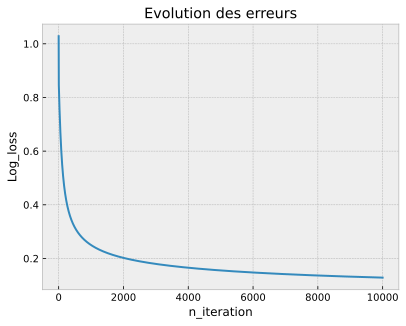

In [77]:
W3,b3=regression_logistique(x_train, y_train)

In [78]:
y_pred = predict(x_test, W3, b3)
print("Accuracy=", accuracy_score(y_test, y_pred))

[[7.54107009e-02]
 [2.54959879e-05]
 [9.96930964e-01]
 [2.48938981e-01]
 [2.10619461e-01]
 [3.52606153e-05]
 [4.11624585e-02]
 [9.79188500e-01]
 [2.48938981e-01]
 [3.34037912e-02]
 [9.03298079e-01]
 [6.28809158e-06]
 [9.68180537e-06]
 [7.00059944e-06]
 [2.05702999e-05]
 [4.13220368e-01]
 [9.83104324e-01]
 [1.97618068e-02]
 [1.01365357e-01]
 [9.79142830e-01]
 [1.33599487e-05]
 [7.19478346e-01]
 [3.92558903e-05]
 [9.64771869e-01]
 [9.74164349e-01]
 [9.81266989e-01]
 [8.70785894e-01]
 [9.91074961e-01]
 [1.84767189e-05]
 [1.33599487e-05]]
Accuracy= 1.0


[6.98494503e-06]
[False]
[0.74148318]
[ True]
[0.10075523]
[False]


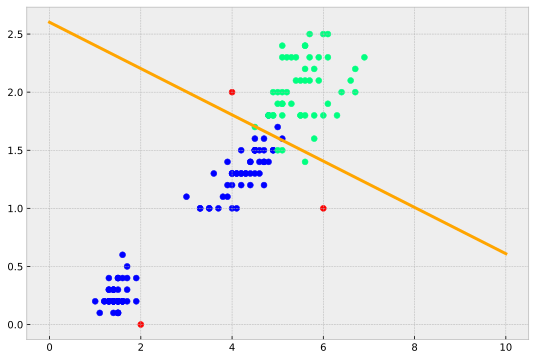

In [79]:
# Visualiser le dataset
fig, ax = plt.subplots(figsize=(9, 6))
ax.scatter(X[:,0], X[:, 1], c=y, cmap='winter')

# Dessiner la frontière de décision
x1 = np.linspace(0, 10, 200)
x2 = ( - W3[0] * x1 - b3) / W3[1]
ax.plot(x1, x2, c='orange', lw=3)

# Prédire la classe de nouveaux éléments

new_1=np.array([2, 0])
new_2=np.array([4, 2])
new_3=np.array([6, 1])
ax.scatter(new_1[0], new_1[1], c='r')
ax.scatter(new_2[0], new_2[1], c='r')
ax.scatter(new_3[0], new_3[1], c='r')
print(predict(new_1, W3, b3))
print(predict(new_2, W3, b3))
print(predict(new_3, W3, b3))

plt.show()

# KNN

In [80]:
import math
import random

In [81]:
dataset = pd.read_csv("gene_expression.csv")
dataset.head()

FileNotFoundError: [Errno 2] No such file or directory: 'gene_expression.csv'

In [82]:
# Get unique classes
classes = list(set(dataset['Cancer Present'])) 
print('classes:',classes)

number_of_class = len(classes)

print('\nnumber_of_records:',len(dataset))

KeyError: 'Cancer Present'

### Dataset d'entrainement et de test

In [ ]:
# Splitting into training and testing datasets
indexes = random.sample(range(0, len(dataset)), len(dataset))
training_dataset = dataset.iloc[indexes[:2500]].values
testing_dataset = dataset.iloc[indexes[2500:]].values

### La fonction de la distance euclidiènne KNN

In [83]:
def knn(training_dataset, test, k):
    # Euclidean Distance
    ED = np.sqrt(np.sum(np.square(training_dataset[:, :2] - test[:2]), axis=1))
    sorted_ED = np.argsort(ED)
    
    KNN = []
    for i in range(k):
        index = sorted_ED[i]
        KNN.append(training_dataset[index][-1])
    return KNN

In [84]:
k = 5

# Creating a new DataFrame
result = pd.DataFrame(columns=['Gene One', 'Gene Two', 'predicted_class', 'actual_class', 'neighbours(K)', 'Class_0', 'Class_1'])

for i in range(len(testing_dataset)):
    KNN = knn(training_dataset, testing_dataset[i], k)
    
    class_0 = sum(1 for element in KNN if element == 0)
    class_1 = sum(1 for element in KNN if element == 1)
    
    predicted_class = 'Class_0' if class_0 > class_1 else 'Class_1'
    actual_class = 'Class_0' if testing_dataset[i][-1] == 0 else 'Class_1'
    
    result.loc[i] = [testing_dataset[i][0], testing_dataset[i][1], predicted_class, actual_class, k, class_0, class_1]

result

NameError: name 'testing_dataset' is not defined

## Evaluation du modèle
### Accuracy

In [85]:
accuracy_data = result['actual_class']==result['predicted_class']

true = 0
false = 0
for bool_value in accuracy_data:
    if(bool_value == True):
        true+=1
    else:
        false+=1

In [86]:
accuracy = true/len(accuracy_data)

ZeroDivisionError: division by zero

In [87]:
accuracy

NameError: name 'accuracy' is not defined